**Project Overview 專案概述**<p>
This project investigates whether hotel pricing, measured by Average Daily Rate (ADR), differs significantly across seasons using statistical hypothesis testing. The analysis is based on a synthetic dataset simulating realistic hotel performance over a full year (365 days).</br>
- Seasons Definition:</br>
    - Spring: March - May</br>
    - Summer: June - August</br>
    - Fall: September - November</br>
    - Winter: January - Febuary, December</br>
- Column Definitions:</br>
    - `rn`: Room Nights</br>
    - `adr`: Average Daily Rate</br>
    - `occ`: Ocupancy rate(%)</br>
    - `rev`: Revenue</br>
- Notes:</br>
    - `ADR = Revenue / Room Nights`<p>

此專案使用統計學假說檢定，來研究飯店是否在不同季節的價格(使用平均房價)有顯著差異。本分析使用模擬飯店一整年的營運情形（365天）的合成資料。</br>
- 季節定義:</br>
    - 春季: 三月至五月</br>
    - 夏季: 六月至八月</br>
    - 秋季: 九月至十一月</br>
    - 冬季: 一月至二月、十二月</br>
- 欄位定義:</br>
    - `rn`: 房晚數</br>
    - `adr`: 平均房價</br>
    - `occ`: 住房率(%)</br>
    - `rev`: 營收</br>
- 備註:</br>
    - `平均房價 = 營收 / 房晚數`<p>

**Data Preparation and Exploration 資料處理與探索**<p>
- Imported libraries, loaded dataset, displayed `.head()`, `.info()`, `.describe()`</br>
- Extracted `month` from date column and created a `season` column.</br>
- Performed EDA: calculated seasonal averages for ADR and occupancy.</br>
- Created boxplots to visualize distribution of ADR and occupancy across seasons.<p>

- 宣告涵式庫, 讀取資料, 顯示`.head()`, `.info()`, `.describe()`涵式。</br>
- 從日期欄位擷取`月份`並生成`季節`欄位。</br>
- 探索式資料分析(EDA): 計算各季節平均房價及住房率之平均、標準差等統計數據。</br>
- 建立各季節平均房價及住房率的盒鬚圖圖表。<p>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd


hotel = pd.read_csv('Mock_Hotel_daily.csv')

###Understanding the data
print(hotel.head())
hotel.info()
hotel.describe()


       date dayofweek  daytype special_event  rn_fit  rn_git  rn_corp  \
0  2023/1/1       Sun  holiday           NaN     227      11        2   
1  2023/1/2       Mon     peak           NaN     114       1        7   
2  2023/1/3       Tue  weekday           NaN      59       8       11   
3  2023/1/4       Wed  weekday           NaN      59       0       15   
4  2023/1/5       Thu  weekday           NaN      62      70       17   

   adr_fit  adr_git  adr_corp  rev_fit  rev_git  rev_corp  rn_ttl  adr_ttl  \
0    12956     8190      2028  2940985    90089      4055     240    12646   
1     5292     5356      1905   603342     5356     13335     122     5099   
2     3840     2361      2448   226576    18892     26925      78     3492   
3     3846        0      2486   226924        0     37296      74     3571   
4     4371     1939      1818   271014   135750     30910     149     2937   

   rev_ttl  occ  
0  3035128   83  
1   622033   42  
2   272393   27  
3   264220   25  
4 

,rn_fit,rn_git,rn_corp,adr_fit,adr_git,adr_corp,rev_fit,rev_git,rev_corp,rn_ttl,adr_ttl,rev_ttl,occ
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02,365.000000,3.650000e+02,365.000000,365.000000,3.650000e+02,365.000000
mean,133.457534,44.328767,34.706849,5961.169863,3612.142466,2645.830137,8.850931e+05,131075.923288,9.949815e+04,212.493151,5081.901370,1.115667e+06,73.153425
std,58.375504,39.085724,29.980746,2373.574883,2522.173112,709.589750,6.718671e+05,110278.580188,1.181452e+05,43.884252,2401.825746,6.459946e+05,15.119797
min,13.000000,0.000000,2.000000,2800.000000,0.000000,750.000000,8.531200e+04,0.000000,4.055000e+03,74.000000,2327.000000,2.642200e+05,25.000000
25%,77.000000,13.000000,20.000000,4303.000000,2211.000000,2187.000000,3.288570e+05,46402.000000,4.758700e+04,190.000000,3275.000000,6.370540e+05,65.000000
50%,131.000000,33.000000,31.000000,5164.000000,2777.000000,2542.000000,7.225440e+05,100126.000000,7.471400e+04,220.000000,4306.000000,9.407280e+05,76.000000
75%,183.000000,70.000000,41.000000,6786.000000,4382.000000,2911.000000,1.166399e+06,194267.000000,1.099210e+05,242.000000,5682.000000,1.373796e+06,83.000000
max,265.000000,172.000000,267.000000,15309.000000,23542.000000,6084.000000,2.962738e+06,575982.000000,1.014587e+06,288.000000,14779.000000,3.089248e+06,99.000000


In [5]:
###Data processing
hotel['month'] = hotel['date'].str.split('/').str[1].str.zfill(2)
conditions = [
    hotel.month.isin(['03', '04', '05']),
    hotel.month.isin(['06', '07', '08']),
    hotel.month.isin(['09', '10', '11']),
    hotel.month.isin(['01', '02' ,'12'])]
seasons = ['spring', 'summer', 'fall', 'winter']
hotel['season'] = np.select(conditions, seasons, default='unknown')

###EDA
summary = hotel.groupby('season')[['adr_ttl', 'occ']].agg(['mean', 'median', 'std', 'max', 'min']).round(2)
summary

adr_ttl                                  occ                      
           mean  median      std    max   min   mean median    std max min
season                                                                    
fall    4533.47  3775.0  2138.61  11474  2327  74.41   76.0  13.63  97  27
spring  4691.22  3890.0  2252.21  11058  2411  67.87   71.0  14.75  97  35
summer  5478.99  4948.0  2019.40  11230  2797  77.47   79.0  13.09  98  38
winter  5629.88  4484.5  2946.28  14779  2333  72.88   78.0  17.32  99  25

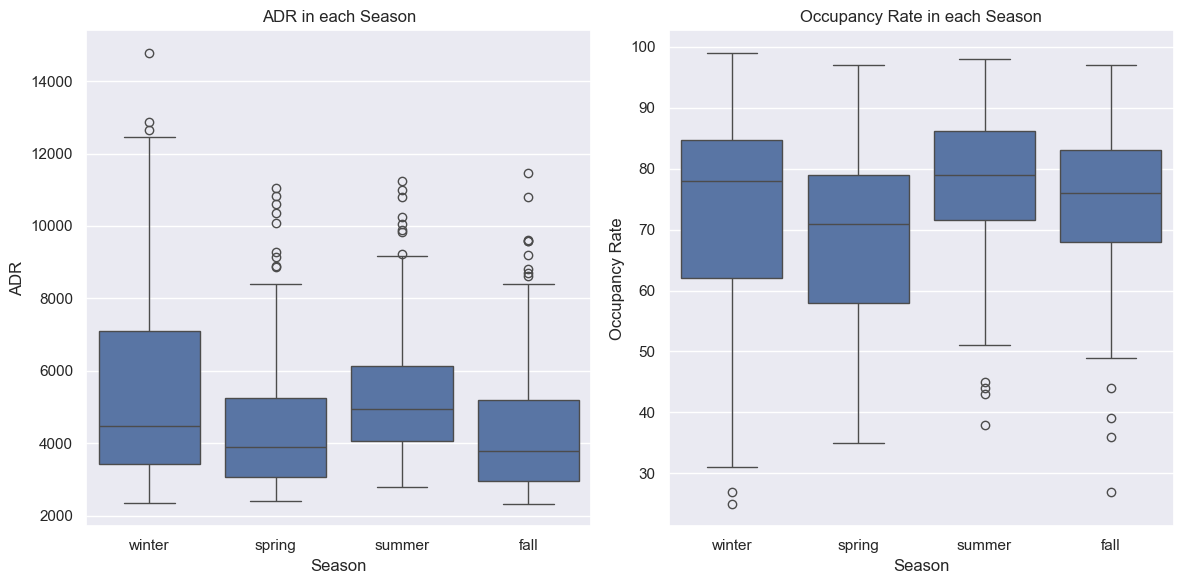

In [6]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.boxplot(hotel, x='season', y='adr_ttl')
ax1 = plt.title('ADR in each Season')
ax1 = plt.xlabel('Season')
ax1 = plt.ylabel('ADR')
ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.boxplot(hotel, x='season', y='occ')
ax1 = plt.title('Occupancy Rate in each Season')
ax1 = plt.xlabel('Season')
ax1 = plt.ylabel('Occupancy Rate')
plt.tight_layout()
plt.show()

**Hypothesis 1 - Seasonal ADR Differences 假設1 - 平均房價季節差異**<p>
*Null Hypothesis (H0)*: There is no significant difference in ADR between seasons.</br>
*Alternative Hypothesis (Ha)*: At least one season's ADR differs.</br>
- Used One-way ANOVA to test differences across the four seasons.</br>
    - Result: p-value << 0.05 → Reject H₀.</br>
- Used Tukey's Range Test to identify which season pairs differ significantly.</br>
    - Fall–Summer, Fall–Winter, Spring–Winter showed significant differences.</br>
    - Spring–Summer difference was not statistically significant, which contradicts domain expectation.<p>

*虛無假設 (H0)*: 各季節沒有顯著平均房價差異。</br>
*對立假設 (Ha)*: 至少一個季節的平均房價有顯著差異。</br>
- 使用單因子變異數分析(One-way ANOVA)測試季節間差異。</br>
    - 結果: p-value << 0.05 → 虛無假設檢定拒絕。</br>
- 使用杜凱氏事後多重檢驗(Tukey's Range Test)測試哪組季節間存在顯著差異。</br>
    - 秋季-夏季、秋季-冬季、春季-冬季都有顯著差異。</br>
    - 春季-夏季並未達到統計上的顯著差異，與領域經驗上不同。</br>

In [8]:
###One-way ANOVA
groups = [hotel.loc[hotel['season'] == s, 'adr_ttl'] for s in seasons]
f_stat, p_val = f_oneway(*groups)
print('Significance difference in occupancy between seasons: ', p_val)

###Tukey's Range Test
tukey = pairwise_tukeyhsd(hotel.adr_ttl, hotel.season, 0.05)
print(tukey)

Significance difference in occupancy between seasons:  0.002224600077694387
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
  fall spring  157.7449 0.9693 -744.2257 1059.7154  False
  fall summer  945.5166 0.0358   43.5461 1847.4871   True
  fall winter 1096.4053 0.0105  189.4649 2003.3456   True
spring summer  787.7717 0.1094  -111.731 1687.2745  False
spring winter  938.6604 0.0385   34.1742 1843.1466   True
summer winter  150.8886 0.9732 -753.5975 1055.3748  False
---------------------------------------------------------


**Hypothesis 2 - Occupancy Between Spring and Summer 假設2 - 春季和夏季間的住房率**<p>
Although ADR differences between spring and summer are not significant, domain knowledge suggests that summer is typically a peak season, and spring is a lower-demand season. This raises the possibility that spring ADR may be misaligned with demand, potentially suppressing occupancy.</br>

*Null Hypothesis (H0)*: There is no significant difference in occupancy between Spring and Summer.</br>
*Alternative Hypothesis (Ha)*: There is a significant difference in occupancy between Spring and Summer.</br>
- Applied two-sample t-test</br>
    - Result: p-value << 0.05 → Reject H₀.</br>
    - Conclusion: Occupancy in spring is significantly lower than in summer, possibly due to higher-than-optimal prices in spring.</br>

即使春季和夏季的平均房價並無顯著差異，基於領域經驗，夏季通常是旺季，春季通常為淡季。這可能表示春季的平均房價與實際需求不符，進而壓抑了住房率。</br>
*虛無假設 (H0)*: 春季與夏季間沒有顯著住房率差異。</br>
*對立假設 (Ha)*: 春季與夏季間存在顯著住房率差異。</br>
- 使用雙樣本T檢定(two-sample t-test)。</br>
    - 結果: p-value << 0.05 → 虛無假設檢定拒絕。</br>
    - 結論: 春季住房率顯著低於夏季，可能是因為春季價格過高。</br>

In [10]:
spring_occ = hotel.occ[hotel.season == 'spring']
summer_occ = hotel.occ[hotel.season == 'summer']
t_stat, p_val = ttest_ind(spring_occ, summer_occ)
print('Significance difference in occupancy between spring and summer: ', p_val)

Significance difference in occupancy between spring and summer:  5.85859870320874e-06


**Exploring Spring: ADR vs. Occupancy 探索春季: 平均房價對比住房率**<p>
To explore the assumption that ADR in spring may be too high, a scatter plot was created for ADR vs occupancy within the spring season.</br>
- While correlation does not imply causation, the plot helps illustrate potential price-demand mismatch.<p>

為了探究春季平均房價是否過高，使用散佈圖顯示春季平均房價與住房率間的關係。</br>
- 即使平均房價與住房率間的相關性，無法證明房價過高導致低住房率的因果關係，此圖仍有助於呈現價格與實際需求之間可能存在的不匹配。<p>

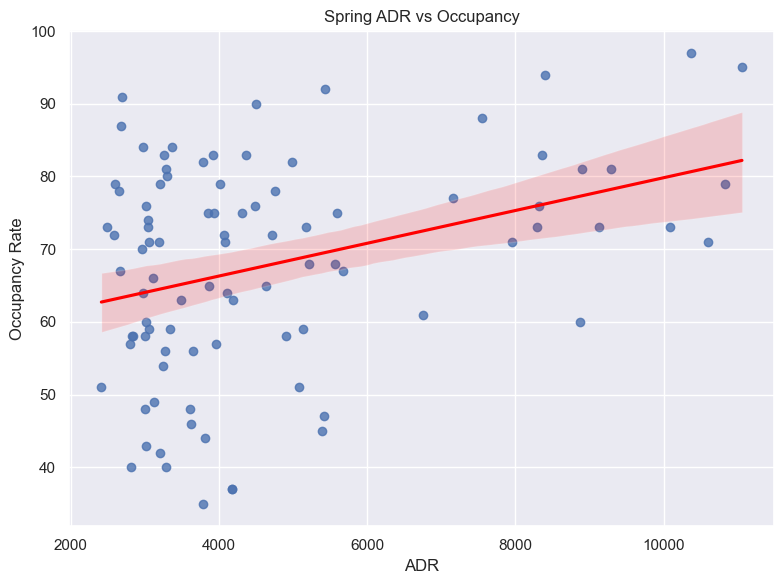

In [12]:
spring_data = hotel[hotel.season == 'spring']
plt.figure(figsize=(8, 6))
sns.regplot(spring_data, x='adr_ttl', y='occ', line_kws={'color': 'red'})
plt.title('Spring ADR vs Occupancy')
plt.xlabel('ADR')
plt.ylabel('Occupancy Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

**Pearson Correlation by Season 皮爾森相關係數分析季節**<p>
Calculated Pearson correlation coefficients between ADR and occupancy for each season:</br>
- Spring: Moderate positive (~0.34)</br>
- Summer: Moderate positive (~0.41)</br>
- Fall: Moderate positive (~0.37)</br>
- Winter: Weak positive (~0.26)</br>

Suggests that in winter, the relationship between price and occupancy is less consistent, possibly due to uneven demand (e.g., Chinese New Year Holiday vs off-peak weeks).<p>

計算各季節平均房價和住房率的皮爾森相關係數:</br>
- 春季: 中度正相關 (~0.34)</br>
- 夏季: 中度正相關 (~0.41)</br>
- 秋季: 中度正相關 (~0.37)</br>
- 冬季: 低度正相關 (~0.26)</br>

顯示冬季的平均房價與住房率之間的關聯較不穩定，可能是受到較大的需求波動影響，例如農曆春節與淡季平日的差異。<p>

In [14]:
hotel.groupby('season')[['adr_ttl', 'occ']].corr().loc[:, 'adr_ttl']

season         
fall    adr_ttl    1.000000
        occ        0.373381
spring  adr_ttl    1.000000
        occ        0.344064
summer  adr_ttl    1.000000
        occ        0.410974
winter  adr_ttl    1.000000
        occ        0.265737
Name: adr_ttl, dtype: float64

**Conclusion 結論**<p>
**Hypothesis 1: Seasonal ADR Differences**<p>
*Null Hypothesis (H0)*: There is no significant difference in prices (ADR) between seasons.</br>
*Alternative Hypothesis (Ha)*: At least one season's prices (ADR) differs.</br>
- Result: p-value << 0.05 → Reject H₀. (p_val: 0.002)</br>
- Tukey’s test shows significant ADR differences between:</br>
    - Fall-Summer</br>
    - Fall-Winter</br>
    - Spring-Winter</br>
- However, the ADR difference between Spring and Summer is not statistically significant.</br>
- Based on domain experience, spring is a low season and summer is peak, so this similarity in pricing raises questions about demand alignment, prompting further investigation into occupancy differences.</br>

**Hypothesis 2: Occupancy Difference Between Spring and Summer**<p>
*Null Hypothesis (H0)*: There is no significant difference in occupancy between Spring and Summer.</br>
*Alternative Hypothesis (Ha)*: There is significant difference in occupancy between Spring and Summer.</br>
- Result: p-value << 0.05 → Reject H₀. (p_val: 0.000005)</br>
- Spring shows significantly lower occupancy despite similar ADRs to summer.</br>
- This suggests that prices in spring may be set too high relative to demand, potentially leading to lower occupancy.</br>

**Relationship between prices and occupancy in spring**<p>
- A positive correlation remains between ADR and occupancy in spring.</br>
- However, the lower overall occupancy compared to summer, despite similar ADRs, suggests a misalignment between pricing and demand.</br>
- While spring demand is generally lower, the data implies that ADR may not be adjusted downward enough to reflect that, potentially reducing occupancy further.</br>

**Weak ADR–Occupancy Correlation in winter**<p>
- Winter shows the weakest correlation between ADR and occupancy (r = 0.26), while other seasons range from 0.34 to 0.41.</br>
- Boxplots reveal a wider spread in both ADR and occupancy during winter.</br>
- Based on domain experience: </br>
    - December typically has stronger demand.</br>
    - January and February are lower-demand months, except for Chinese New Year, which creates short-term price and demand spikes.</br>
- This mix of extremes and low-demand days introduces high variability and possible demand inelasticity, weakening the linear relationship between price and occupancy.</br>

**假設1 - 平均房價季節差異**<p>
*虛無假設 (H0)*: 各季節沒有顯著平均房價差異。</br>
*對立假設 (Ha)*: 至少一個季節的平均房差有顯著差異。</br>
- 結果: p-value << 0.05 → 虛無假設檢定拒絕。 (p_val: 0.002)</br>
- 杜凱氏事後多重檢驗(Tukey's Range Test)測試顯示平均房價有顯著差異在:</br>
    - 秋季-夏季</br>
    - 秋季-冬季</br>
    - 春季-冬季</br>
- 春季-夏季並未達到統計上的顯著差異。</br>
- 基於領域經驗，夏季通常是旺季，春季通常為淡季，因此相近的平均房價反而引發了對價格與需求是否匹配的疑問，進而促使進一步探討住房率的差異。</br>

**假設2 - 春季和夏季間的住房率**<p>
*虛無假設 (H0)*: 春季與夏季間沒有顯著住房率差異。</br>
*對立假設 (Ha)*: 春季與夏季間存在著顯著住房率差異。</br>
- 結果: p-value << 0.05 → 虛無假設檢定拒絕。 (p_val: 0.000005)</br>
- 春季住房率顯著低於夏季，即使有相近的平均房價。</br>
- 顯示春季價格相對於需求，可能被設定的太高，進而導致較低的住房率。</br>

**春季平均房價與住房率間的關係**<p>
- 春季的平均房價與住房率仍然有正相關。</br>
- 春季相對於夏季，雖然平均房價相近，但是整體有較低的住房率，顯示價格與實際需求之間可能存在的不匹配。</br>
- 儘管春季的需求通常較低，資料顯示房價可能未充分下調以反映實際需求，進而致使住房率降低。.</br>

**冬季平均房價與住房率間的關係偏低**<p>
- 冬季的平均房價與住房率顯示出最低的相關度(r = 0.26), 其他季節則介於0.34至0.41之間。</br>
- 盒鬚圖顯示，冬季的房價與住房率皆呈現較大的分布範圍。</br>
- 基於領域經驗: </br>
    - 十二月通常需求較高。</br>
    - 一月及二月通常是需求最低的月份，但農曆過年期間可能造成短暫的價格及需求高峰。</br>
- 高峰與低需求時期交錯出現，導致需求高度波動及不具彈性，使價格與住房率之間的線性關係被削弱。</br>